# Peak Finder

## R = 1:1, b = 0 kpc, t=0.0Gyr

In [98]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
hdul = fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0000_slice.t=0.00.fits")
hdul.info()

Filename: images/fiducial_1to1_b0_hdf5_plt_cnt_0000_slice.t=0.00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DENSITY       1 PrimaryHDU      23   (2048, 2048)   float64   
  1  VELOCITY_Y    1 ImageHDU        24   (2048, 2048)   float64   
  2  VELOCITY_X    1 ImageHDU        24   (2048, 2048)   float64   
  3  KT            1 ImageHDU        24   (2048, 2048)   float64   
  4  CLR2          1 ImageHDU        24   (2048, 2048)   float64   
  5  DARK_MATTER_DENSITY    1 ImageHDU        24   (2048, 2048)   float64   
  6  CLR1          1 ImageHDU        24   (2048, 2048)   float64   


In [100]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
EXTEND  =                    T                                                  
EXTNAME = 'DENSITY '           / extension name                                 
BTYPE   = 'density '                                                            
BUNIT   = 'Msun/kpc**3'                                                         
WCSAXES =                    2                                                  
CRPIX1  =               1024.5                                                  
CRPIX2  =               1024.5                                                  
CDELT1  =      6.96261175585

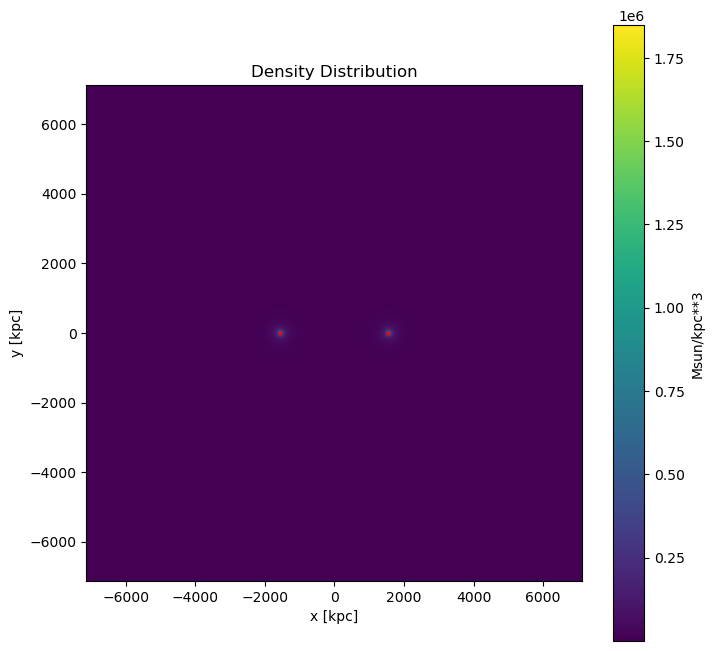

(x,y):  [(-1549.1811156787164, 3.4813058779297), (1549.1811156787164, -3.4813058779297)]
The distance between the brightest points is greater than 50 kpc.


In [101]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0000_slice.t=0.00.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=3)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.30Gyr

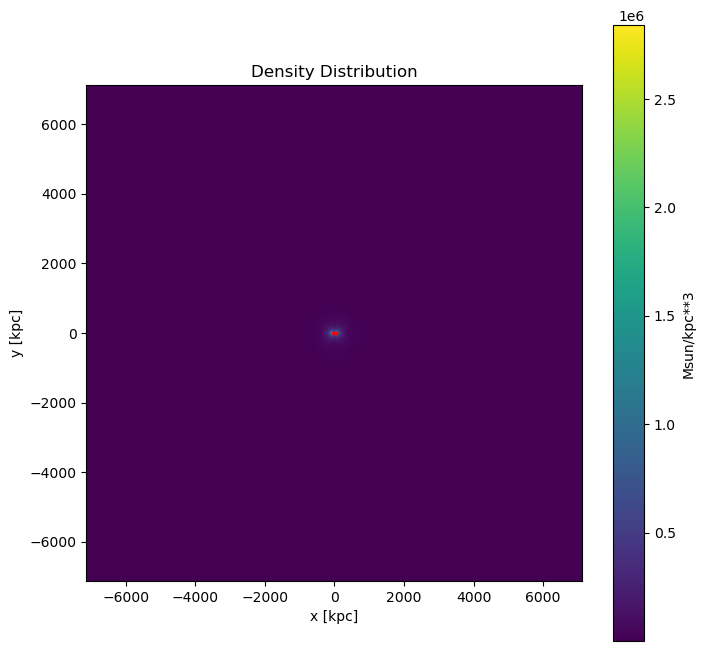

(x,y):  [(45.2569764130861, -3.4813058779297), (-45.2569764130861, -3.4813058779297)]
The distance between the brightest points is greater than 50 kpc.


In [102]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0065_slice.t=1.30.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=3)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.32Gyr

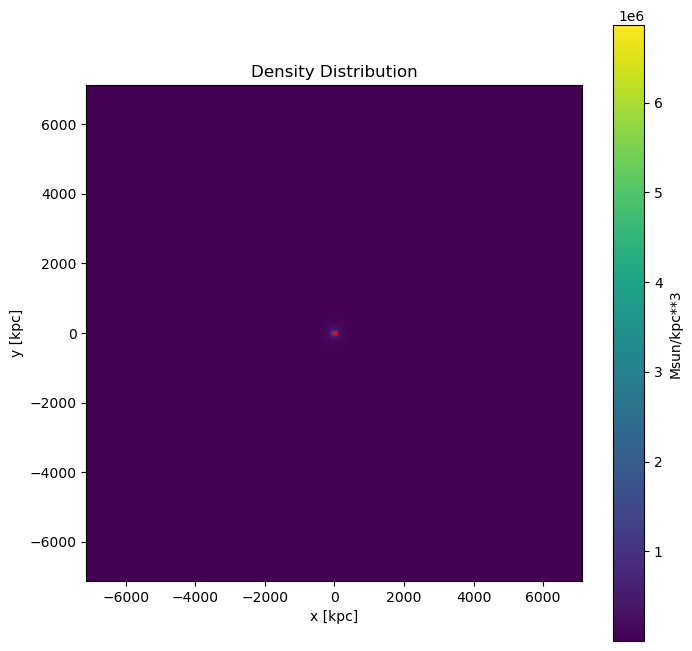

(x,y):  [(10.4439176337891, -3.4813058779297), (-10.4439176337891, -3.4813058779297)]
The distance between the brightest points is within 50 kpc.


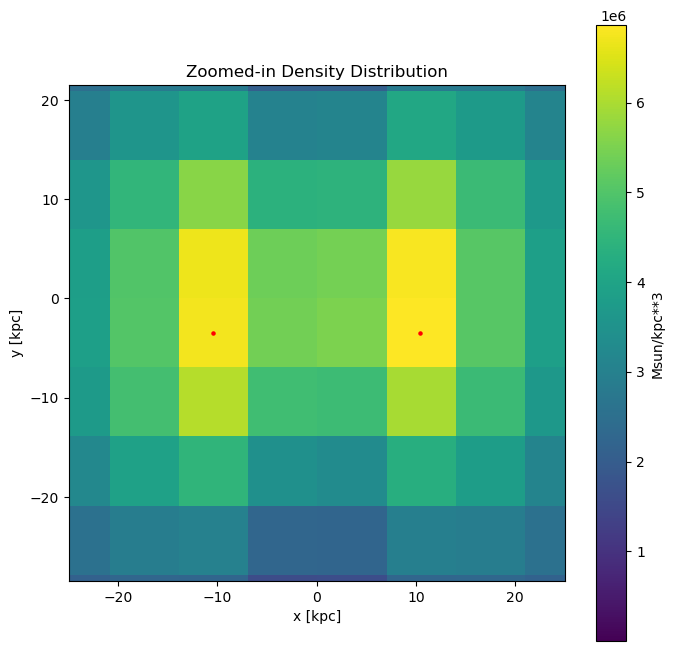

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0066_slice.t=1.32.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.34Gyr

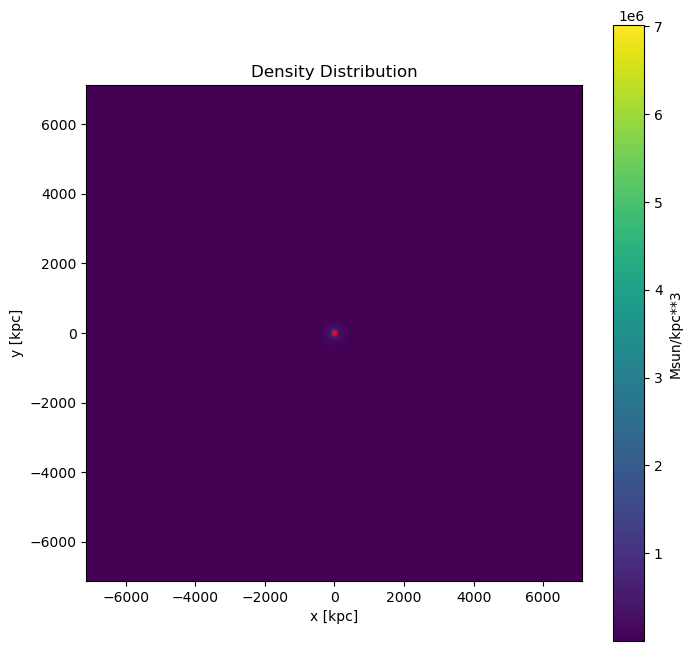

(x,y):  [(3.4813058779297, -3.4813058779297), (-3.4813058779297, -3.4813058779297)]
The distance between the brightest points is within 50 kpc.


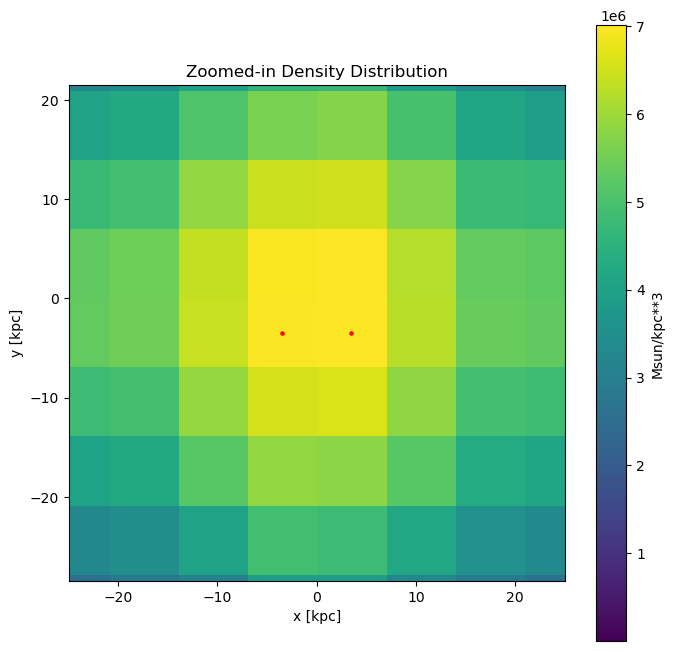

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0067_slice.t=1.34.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.36Gyr

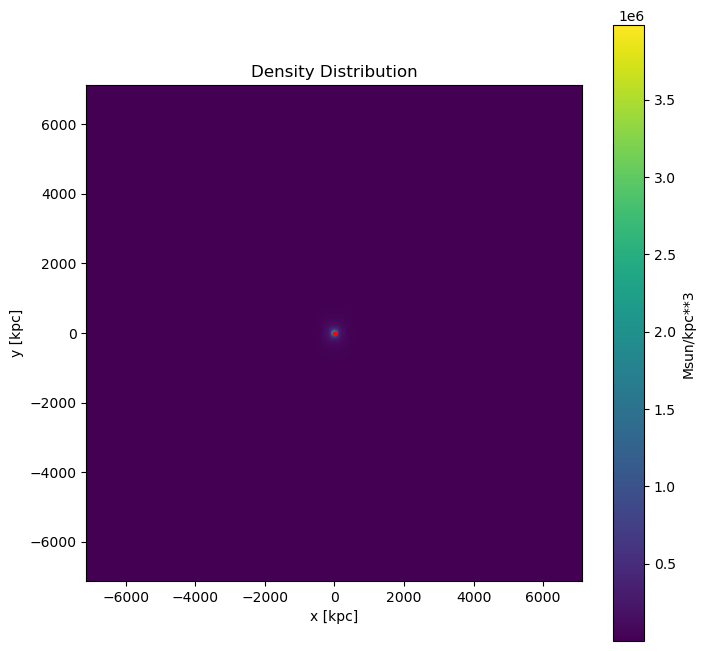

(x,y):  [(-3.4813058779297, -3.4813058779297), (3.4813058779297, -3.4813058779297)]
The distance between the brightest points is within 50 kpc.


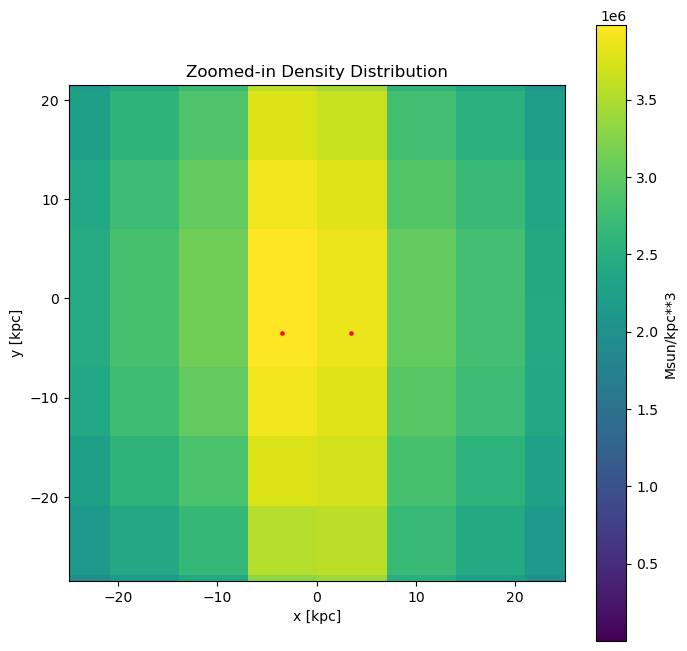

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0068_slice.t=1.36.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.38Gyr

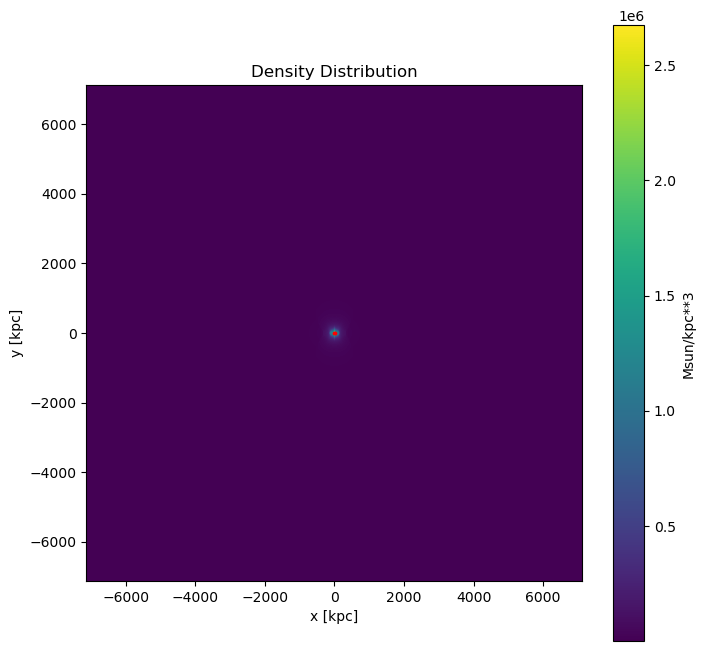

(x,y):  [(-3.4813058779297, -3.4813058779297), (3.4813058779297, 3.4813058779297)]
The distance between the brightest points is within 50 kpc.


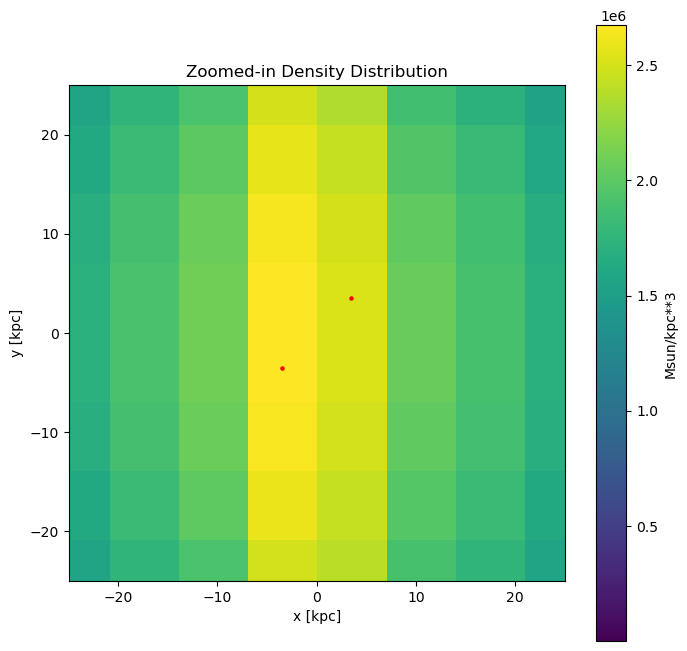

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0069_slice.t=1.38.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.40Gyr

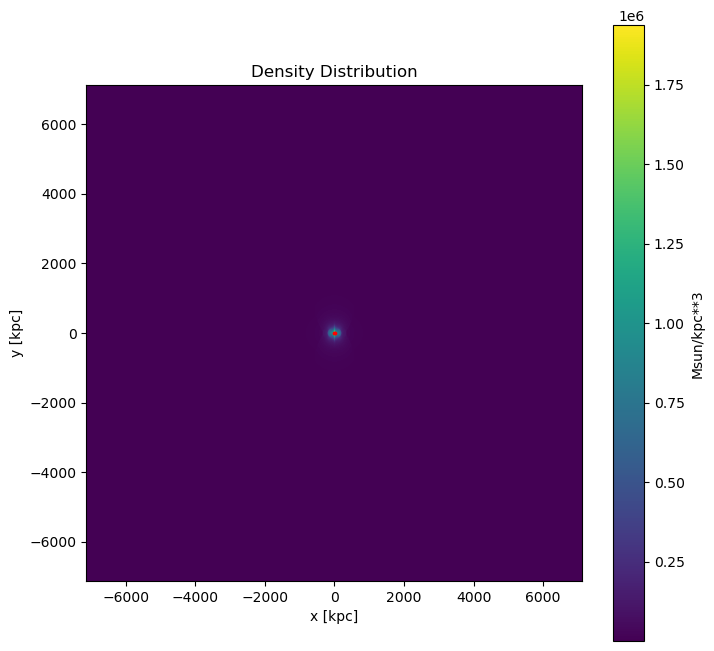

(x,y):  [(-3.4813058779297, -3.4813058779297), (3.4813058779297, 3.4813058779297)]
The distance between the brightest points is within 50 kpc.


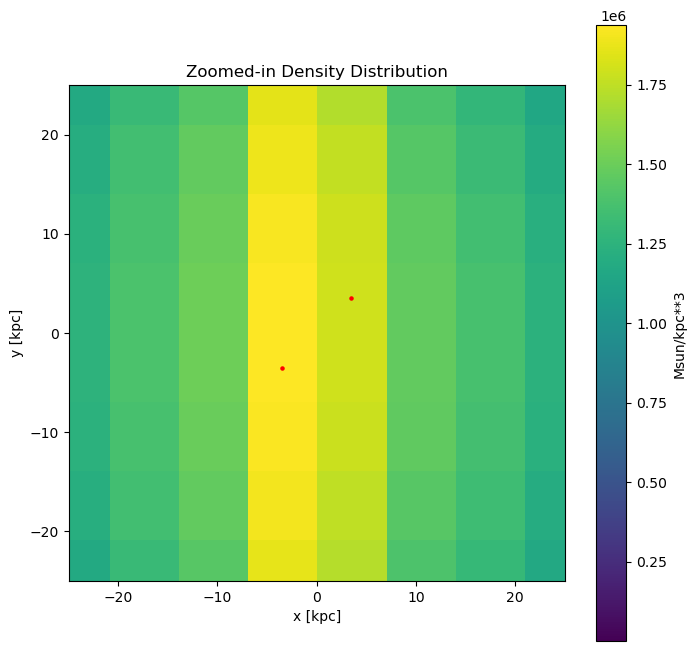

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0070_slice.t=1.40.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.50Gyr

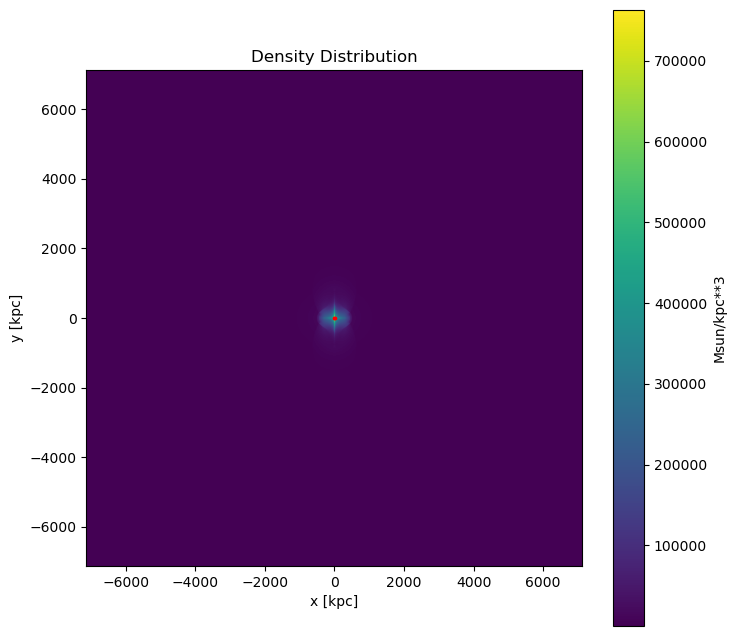

(x,y):  [(-3.4813058779297, -3.4813058779297), (3.4813058779297, 3.4813058779297)]
The distance between the brightest points is within 50 kpc.


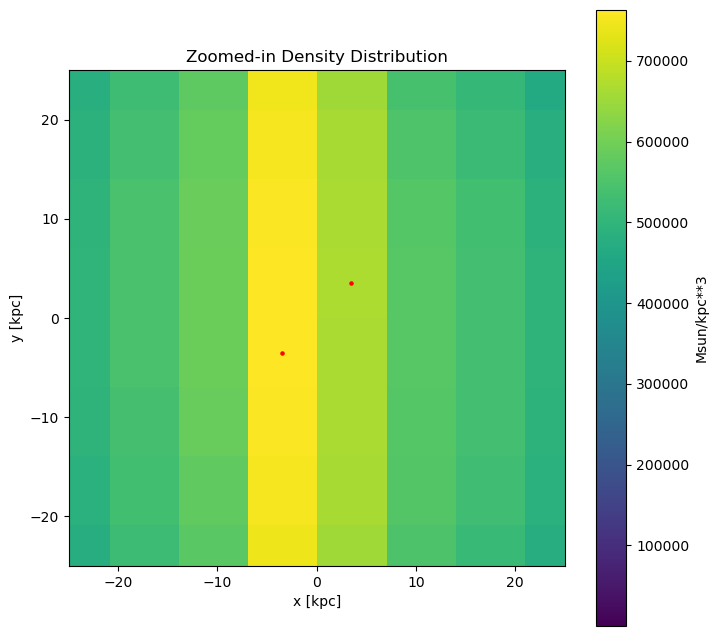

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0075_slice.t=1.50.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    else:
        i=0

    header = hdul[i].header
    data = hdul[i].data

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()


## R = 1:1, b = 0 kpc, t=1.60Gyr

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2048                                                  NAXIS2  =                 2048                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               EXTNAME = 'KT      '           / extension name                                 BTYPE   = 'kT      '                                                            BUNIT   = 'keV     '                                                            WCSAXES =                    2                                                  CRPIX1  =               1024.5                                                  CRPIX2  =               1024.5          

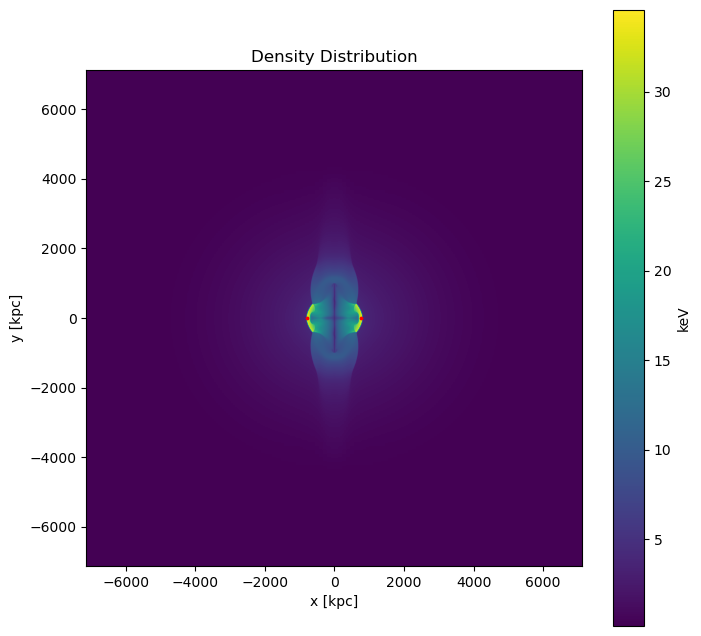

(x,y):  [(776.3312107783231, -3.4813058779297), (-776.3312107783231, -3.4813058779297)]
The distance between the brightest points is greater than 50 kpc.


In [110]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Extract the header and data from the FITS file
with fits.open("images/fiducial_1to1_b0_hdf5_plt_cnt_0080_slice.t=1.60.fits") as hdul:
    if hdul[0].name != "DENSITY":
        i=2
    elif hdul[3].name != 'TOTAL_DENSITY':
        i=3
    else:
        i=0
    

    header = hdul[i].header
    print(header)
    data = hdul[i].data
    
print(hdul.info())

# Extract relevant header information
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
cunit1 = header['CUNIT1']
cunit2 = header['CUNIT2']
bunit = header['BUNIT']

# Create the x and y axis values
x = (np.arange(data.shape[1]) - (crpix1 - 1)) * cdelt1
y = (np.arange(data.shape[0]) - (crpix2 - 1)) * cdelt2

# Find the two brightest points in the data with a unique x-coordinate constraint
flat_indices = np.argsort(data, axis=None)[::-1]  # Sort indices by brightness, descending
brightest_points = []

for idx in flat_indices:
    point = np.unravel_index(idx, data.shape)
    x_coord = x[point[1]]
    
    if len(brightest_points) == 0 or all(abs(x_coord - x[brightest_points[i][1]]) > 1e-6 for i in range(len(brightest_points))):
        brightest_points.append(point)
    
    if len(brightest_points) == 2:
        break

# Plot the data with the two brightest points marked
plt.figure(figsize=(8, 8))
plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label=bunit)
plt.xlabel(f'x [{cunit1.strip()}]')
plt.ylabel(f'y [{cunit2.strip()}]')
plt.title('Density Distribution')

# Mark the two brightest points
for point in brightest_points:
    plt.scatter(x[point[1]], y[point[0]], color='red', s=3)

plt.show()

# print("(x,y): ", [(x[point[1]], y[point[0]]) for point in brightest_points])

# Calculate the distance between the two brightest points
distance = np.sqrt((x[brightest_points[0][1]] - x[brightest_points[1][1]])**2 + 
                   (y[brightest_points[0][0]] - y[brightest_points[1][0]])**2)

# Print the coordinates of the brightest points
brightest_coords = [(x[point[1]], y[point[0]]) for point in brightest_points]
print("(x,y): ", brightest_coords)

# If the distance is within 50 kpc, show a zoomed-in view
if distance < 50:
    print("The distance between the brightest points is within 50 kpc.")
    
    # Determine the center of the two points
    center_x = (x[brightest_points[0][1]] + x[brightest_points[1][1]]) / 2
    center_y = (y[brightest_points[0][0]] + y[brightest_points[1][0]]) / 2
    
    # Determine the range for the zoomed-in view
    zoom_range = 25  # 50 kpc diameter, so 25 kpc radius
    x_min = center_x - zoom_range
    x_max = center_x + zoom_range
    y_min = center_y - zoom_range
    y_max = center_y + zoom_range
    
    # Plot the zoomed-in view
    plt.figure(figsize=(8, 8))
    plt.imshow(data, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
    plt.colorbar(label=bunit)
    plt.xlabel(f'x [{cunit1.strip()}]')
    plt.ylabel(f'y [{cunit2.strip()}]')
    plt.title('Zoomed-in Density Distribution')
    
    # Mark the two brightest points
    for point in brightest_points:
        plt.scatter(x[point[1]], y[point[0]], color='red', s=5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
else:
    print("The distance between the brightest points is greater than 50 kpc.")



hdul.close()
